In [1]:
from ca_abc import *
from potentials import *
from optimizers import *

import matplotlib.pyplot as plt
import numpy as np

Simulation completed.


Energies of found minima:
Minimum 1: Position = [0.41292029], Energy = [-0.82415849]
Minimum 2: Position = [-2.27151103], Energy = [-1.672135]
Minimum 3: Position = [8.69998909], Energy = [-8.2360833]
Minimum 4: Position = [10.35518342], Energy = [-3.94734152]
Minimum 5: Position = [2.71638088], Energy = [2.00177659]

Approximate saddle points between minima:
Saddle 1: Position = [-0.7539805], Energy = [0.1352226]
Saddle 2: Position = [1.47330961], Energy = [1.77610638]
Saddle 3: Position = [9.48029249], Energy = [-3.82266826]
Saddle 4: Position = [5.8070414], Energy = [2.29636909]

Computational statistics:
	Energy evaluations: 52305
	Force evaluations: 0
	Total steps: 10496

Verification against reference:
True minima found: 5/5

Verification against reference (saddles):
True saddles found: 0/4
Missed saddles at positions:
[-1.2645]
[1.94219]
[4.55508]
[9.7913]
Simulation completed.


Energies of found minima:
Minimum 1: Position = [0.41292029], Energy = [-0.8

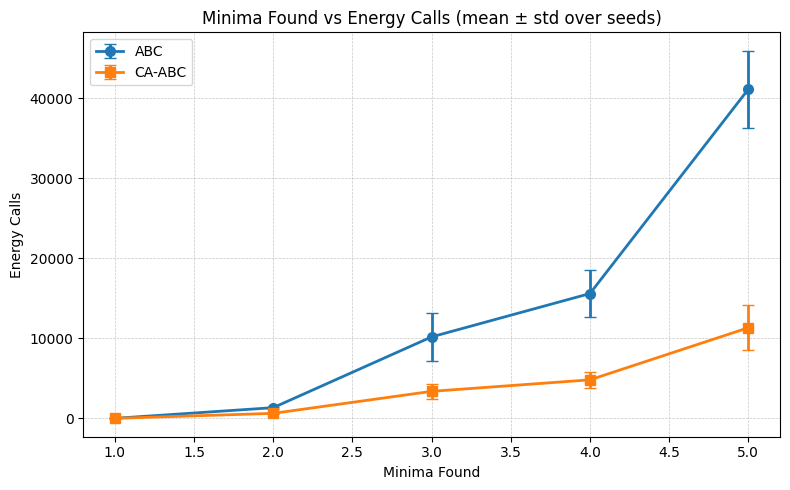

In [27]:
seeds = [0, 1, 2, 3, 4]
abc_energy_calls = []
ca_abc_energy_calls = []

for seed in seeds:
    np.random.seed(seed)
    abc_instance = CurvatureAdaptiveABC(
        potential=Complex1D(),
        starting_position=[0.1],
        curvature_method="none", 
        dump_every=10000,
        perturb_type="fixed",
        default_perturbation_size=0.05,
        scale_perturb_by_curvature=False,
        random_perturb_every=1000,
        bias_height_type="fixed",
        default_bias_height=0.2,
        bias_covariance_type="fixed",
        default_bias_covariance=0.003,
        min_bias_covariance=0.003,
        bias_delta=0.05,
        max_descent_steps=100, 
        descent_convergence_threshold=1e-4
    )
    ca_abc_instance = CurvatureAdaptiveABC(
        potential=Complex1D(),
        starting_position=[0.1],
        curvature_method="bfgs", 
        dump_every=10000,
        perturb_type="adaptive",
        default_perturbation_size=0.05,
        scale_perturb_by_curvature=False,
        random_perturb_every=1000,
        bias_height_type="fixed",
        default_bias_height=0.2,
        bias_covariance_type="adaptive",
        default_bias_covariance=0.003,
        min_bias_covariance=0.003,
        bias_delta=0.01,
        max_descent_steps=100, 
        descent_convergence_threshold=1e-4
    )
    abc_instance.run(max_iterations=2000, optimizer=ScipyOptimizer(abc_instance, "BFGS"), verbose=False)
    ca_abc_instance.run(max_iterations=600, optimizer=ScipyOptimizer(ca_abc_instance, "BFGS"), verbose=False)
    abc_energy_calls.append(abc_instance.energy_calls)
    ca_abc_energy_calls.append(ca_abc_instance.energy_calls)

# Pad lists to the same length for plotting
max_len = max(max(len(x) for x in abc_energy_calls), max(len(x) for x in ca_abc_energy_calls))
def pad(lst, length):
    return lst + [np.nan] * (length - len(lst))

abc_energy_calls = np.array([pad(x, max_len) for x in abc_energy_calls])
ca_abc_energy_calls = np.array([pad(x, max_len) for x in ca_abc_energy_calls])

abc_mean = np.nanmean(abc_energy_calls, axis=0)
abc_std = np.nanstd(abc_energy_calls, axis=0)
ca_abc_mean = np.nanmean(ca_abc_energy_calls, axis=0)
ca_abc_std = np.nanstd(ca_abc_energy_calls, axis=0)

plt.figure(figsize=(8, 5))
plt.errorbar(range(1, max_len+1), abc_mean, yerr=abc_std, label='ABC', linewidth=2, color='tab:blue', marker='o', markersize=7, capsize=4)
plt.errorbar(range(1, max_len+1), ca_abc_mean, yerr=ca_abc_std, label='CA-ABC', linewidth=2, color='tab:orange', marker='s', markersize=7, capsize=4)
plt.legend()
plt.ylabel('Energy Calls')
plt.xlabel('Minima Found')
plt.title('Minima Found vs Energy Calls (mean ± std over seeds)')
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)
plt.tight_layout()
plt.show()

None
None
None
Simulation completed.


Energies of found minima:
Minimum 1: Position = [0.62349941 0.02803776], Energy = -108.16672411680968
Minimum 2: Position = [-0.05002146  0.46669684], Energy = -80.76781811438505
Minimum 3: Position = [-0.55822363  1.44172584], Energy = -146.69951720800373

Approximate saddle points between minima:
Saddle 1: Position = [0.25090822 0.33834186], Energy = -71.5402572772426
Saddle 2: Position = [-0.80934269  0.61140592], Energy = -40.78070883975029

Computational statistics:
	Energy evaluations: 46887
	Force evaluations: 46887
	Total steps: 49109

Verification against reference:
True minima found: 3/3

Verification against reference (saddles):
True saddles found: 0/2
Missed saddles at positions:
[0.21248658 0.29298833]
[-0.82200156  0.6243128 ]
None
None
None
None
None
None
None
None
None
None
None
Simulation completed.


Energies of found minima:
Minimum 1: Position = [0.62349941 0.02803776], Energy = -108.166724116767
Minimum 2: Position = [-0.05185

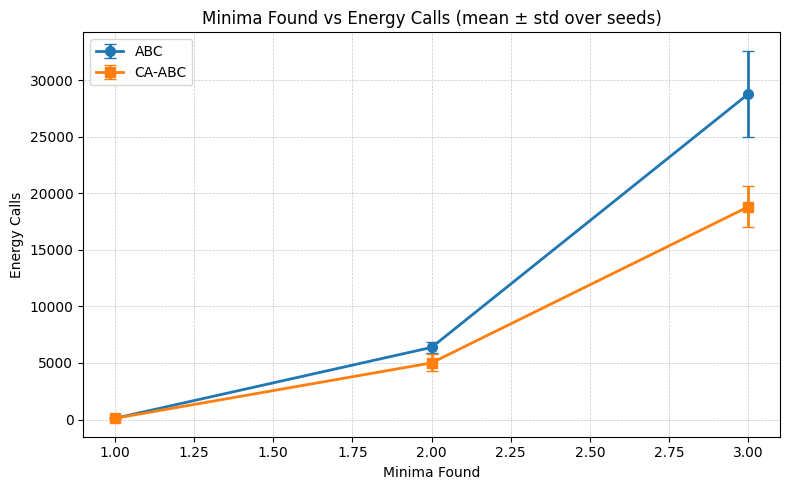

In [7]:
seeds = [0, 1, 2, 3, 4]
abc_energy_calls = []
ca_abc_energy_calls = []

for seed in seeds:
    np.random.seed(seed)
    abc_instance = CurvatureAdaptiveABC(
        potential=StandardMullerBrown2D(),
        starting_position=[0.0, 0.0],
        curvature_method="None",

        perturb_type="fixed",
        default_perturbation_size=0.005,
        scale_perturb_by_curvature=True,
        curvature_perturbation_scale=0.1,
        max_perturbation_size=0.01,
     
        bias_height_type="fixed",
        default_bias_height=2,
        # min_bias_height= 0.5,
        # max_bias_height= 3,
        # curvature_bias_height_scale=100,

        bias_covariance_type="fixed",
        default_bias_covariance=0.01,
        min_bias_covariance= 0.01,
        max_bias_covariance= 0.05,
        bias_delta=0.00002,
        # curvature_bias_covariance_scale=10,
        
        max_descent_steps=300,
        descent_convergence_threshold=1e-6, 
        max_acceptable_force_mag=1e99,
    )
    
    ca_abc_instance = CurvatureAdaptiveABC(
        potential=StandardMullerBrown2D(),
        starting_position=[0.0, 0.0],
        curvature_method="bfgs",

        perturb_type="adaptive",
        default_perturbation_size=0.005,
        scale_perturb_by_curvature=True,
        curvature_perturbation_scale=0.1,
        max_perturbation_size=0.01,
     
        bias_height_type="fixed",
        default_bias_height=2,
        # min_bias_height= 0.5,
        # max_bias_height= 3,
        # curvature_bias_height_scale=100,

        bias_covariance_type="adaptive",
        default_bias_covariance=0.01,
        min_bias_covariance= 0.01,
        max_bias_covariance= 0.05,
        bias_delta=0.00002,
        # curvature_bias_covariance_scale=10,
        
        max_descent_steps=300,
        descent_convergence_threshold=1e-6, 
        max_acceptable_force_mag=1e99,
    )
    abc_instance.run(max_iterations=350, optimizer=FIREOptimizer(abc_instance), verbose=False)
    ca_abc_instance.run(max_iterations=350, optimizer=FIREOptimizer(ca_abc_instance), verbose=False)
    abc_energy_calls.append(abc_instance.energy_calls)
    ca_abc_energy_calls.append(ca_abc_instance.energy_calls)

# Pad lists to the same length for plotting
max_len = max(max(len(x) for x in abc_energy_calls), max(len(x) for x in ca_abc_energy_calls))
def pad(lst, length):
    return lst + [np.nan] * (length - len(lst))

abc_energy_calls = np.array([pad(x, max_len) for x in abc_energy_calls])
ca_abc_energy_calls = np.array([pad(x, max_len) for x in ca_abc_energy_calls])

abc_mean = np.nanmean(abc_energy_calls, axis=0)
abc_std = np.nanstd(abc_energy_calls, axis=0)
ca_abc_mean = np.nanmean(ca_abc_energy_calls, axis=0)
ca_abc_std = np.nanstd(ca_abc_energy_calls, axis=0)

plt.figure(figsize=(8, 5))
plt.errorbar(range(1, max_len+1), abc_mean, yerr=abc_std, label='ABC', linewidth=2, color='tab:blue', marker='o', markersize=7, capsize=4)
plt.errorbar(range(1, max_len+1), ca_abc_mean, yerr=ca_abc_std, label='CA-ABC', linewidth=2, color='tab:orange', marker='s', markersize=7, capsize=4)
plt.legend()
plt.ylabel('Energy Calls')
plt.xlabel('Minima Found')
plt.title('Minima Found vs Energy Calls (mean ± std over seeds)')
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)
plt.tight_layout()
plt.show()

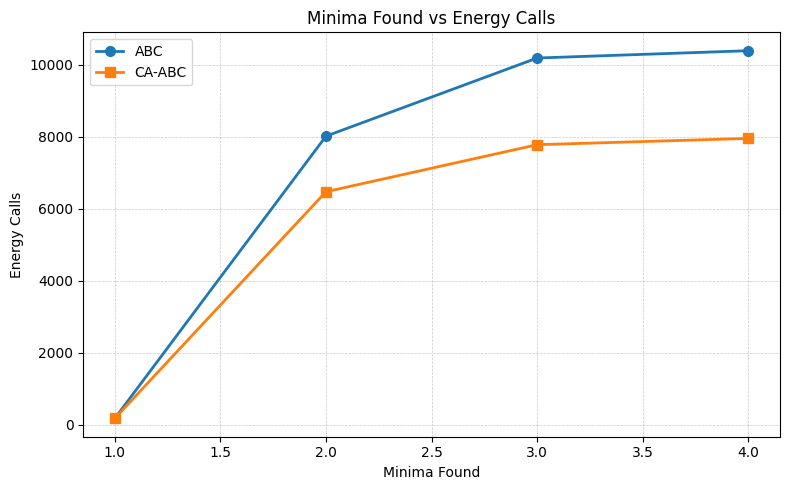

In [13]:
adaptive_lj_13 = [173, 6473, 7780, 7955]
lj_13 = [173, 8018, 10190, 10393]

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(lj_13) + 1), lj_13, label='ABC', linewidth=2, color='tab:blue', marker='o', markersize=7)
plt.plot(range(1, len(adaptive_lj_13) + 1), adaptive_lj_13, label='CA-ABC', linewidth=2, color='tab:orange', marker='s', markersize=7)
plt.legend()
plt.ylabel('Energy Calls')
plt.xlabel('Minima Found')
plt.title('Minima Found vs Energy Calls')
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)
plt.tight_layout()
plt.show()